# ELE435/535 2019, LAB 8: Kernel Methods

## Main Parts of the LAB:
## 1) Kernel-PCA on synthetic data
## 2) Kernel-SVM on MNIST
## 3) Kernel-nearest neighbor on Liver Disorders Dataset
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


## 1) Kernel-PCA

In this assignment, we will study the effectiveness of kernel PCA.

**1-1)** Import the given data "LAB8_data_PCA.npy" into numpy. It contains 1000 points, the first 500 of which belongs to class #1 and the rest belongs to class #2. Each row corresponds to one data point.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from time import time
import datetime
%matplotlib inline

In [122]:
data = np.load("LAB8_data_PCA.npy")
data.shape

(1000, 3)

**1-2)** Visualize the data in 3D. Use different colors for objects from distinct classes.

In [7]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

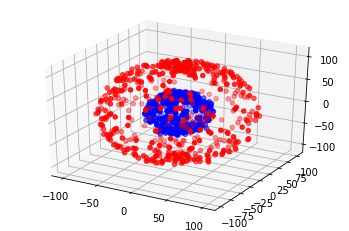

In [22]:
# Data for the classes
ax = plt.axes(projection='3d')

#first class
first_xdata = data[0:500,0]
first_ydata = data[0:500,1]
first_zdata = data[0:500,2]
ax.scatter3D(first_xdata, first_ydata, first_zdata,c='Red');

#second class
second_xdata = data[500:1000,0]
second_ydata = data[500:1000,1]
second_zdata = data[500:1000,2]
ax.scatter3D(second_xdata, second_ydata, second_zdata,c='Blue');


**1-3)** Now perform a normal PCA (i.e. linear PCA) over the data (you may use sklearn's built-in commands for this part). Then project the data onto the span of the first two principal components. Visualize the projected data in 2D. 

Estimated running time:0:00:00.078314


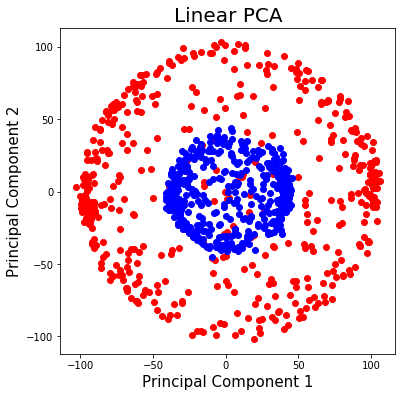

In [32]:
from sklearn.decomposition import PCA
start = time()

#Perform Linear PCA over data
pca3 = PCA(n_components=3)
pca3.fit(data)
data_new = pca3.transform(data)

#project on first two principal components
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(data_new)

#visualize 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Linear PCA', fontsize = 20)

ax.scatter(principalComponents[0:500,0],principalComponents[0:500,1],c='Red')
ax.scatter(principalComponents[500:1000,0],principalComponents[500:1000,1],c='Blue')

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-4)** Now, perform kernel PCA with a 4-th order inhomogeneous polynomial kernel. Then, project the data onto the span of first two principal components and visualize the projected data in 2D **(do not use sklearn's built-in commands for this part; follow the steps mentioned in the notes, e.g. find the Gram matrix of the centered data, then use SVD, etc.)**

In [149]:
import numpy as np
import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

def kernel_poly_pca(X, dimension, n_components):
    #Calculate the dot product for every pair of points
    N = X.shape[0] #number of samples
    M = X.shape[1] #dimensions of data
    
    #Construct the K matrix 
    K = np.zeros((N,N))
    
    for i in range(N):
        x_i = X[i,:]
        for j in range(N):
            x_j = X[j,:]
            K[i,j] = (np.dot(x_i,x_j)+1)**(dimension)
    
    #Construct the Gram matrix of centered data
    one_mat = np.ones((N,N)) / N
    G_mat = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)
    
    #find largest n_component largest eigenvalues of the gram matrix through SVD
    U, S, Vh = la.svd(G_mat, full_matrices=False)
    s_new = np.sqrt(S[:n_components])
    eig_values = np.diag(s_new)
    eig_vectors = U[:,:n_components]
    Z = np.matmul(eig_values,eig_vectors.T)
    
    #obtain new X matrix projected
    X_projected = Z.T
    return X_projected

Estimated running time:0:00:03.724105


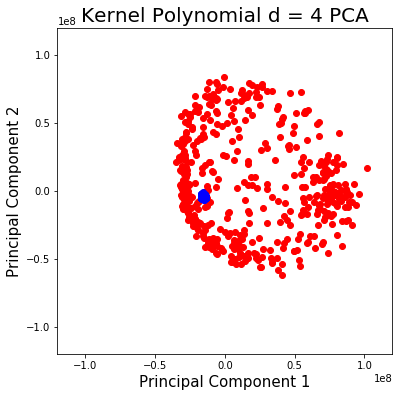

In [156]:
start = time()

data_k_proj = kernel_poly_pca(data, 4, 2)

#visualize 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kernel Polynomial d = 4 PCA', fontsize = 20)
ax.set_ylim([-1.2e8,1.2e8])
ax.set_xlim([-1.2e8,1.2e8])
ax.scatter(data_k_proj[0:500,0],data_k_proj[0:500,1],c='Red')
ax.scatter(data_k_proj[500:1000,0],data_k_proj[500:1000,1],c='Blue')

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-5)** Implement kernel PCA with the RBF kernel **(do not use sklearn's built-in commands; follow the steps in the notes--similar to what you did in the previous part) **
$(k(x,z) = e^{-\gamma \lVert {x-z} \lVert_2^2}, \gamma = 1/2\sigma^2)$.
Choose sigma to be 10, 30, and 100. Also, visualize the projected data onto the span of the first two principal components for each value of sigma.

In [139]:
import numpy as np
import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import math

def kernel_rbf_pca(X, sigma, n_components):
    #Calculate the dot product for every pair of points
    N = X.shape[0] #number of samples
    M = X.shape[1] #dimensions of data
    gamma = 1.0/(2*sigma**2)
    
    #Construct the K matrix 
    K = np.zeros((N,N))
    
    for i in range(N):
        x_i = X[i,:]
        for j in range(N):
            x_j = X[j,:]
            K[i,j] = math.exp(-gamma*((la.norm(x_i-x_j))**2))
            
    #Construct the Gram matrix of centered data
    one_mat = np.ones((N,N)) / N
    G_mat = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)
    
    #find largest n_component largest eigenvalues of the gram matrix through SVD
    U, S, Vh = la.svd(G_mat, full_matrices=False)
    s_new = np.sqrt(S[:n_components])
    eig_values = np.diag(s_new)
    eig_vectors = U[:,:n_components]
    Z = np.matmul(eig_values,eig_vectors.T)
    
    #obtain new X matrix projected
    X_projected = Z.T
    return X_projected

Estimated running time:0:00:11.761055


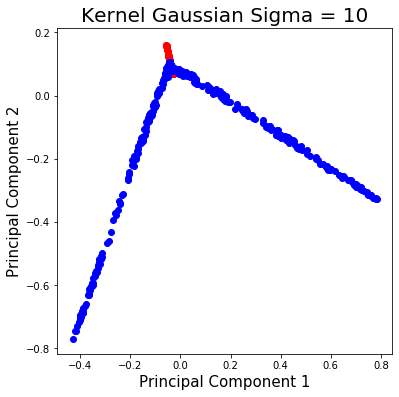

In [140]:
start = time()

sigma_value = 10
    
data_rbf_proj = kernel_rbf_pca(data, sigma_value, 2)

#visualize 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kernel Gaussian Sigma = 10', fontsize = 20)

ax.scatter(data_rbf_proj[0:500,0],data_rbf_proj[0:500,1],c='Red')
ax.scatter(data_rbf_proj[500:1000,0],data_rbf_proj[500:1000,1],c='Blue')

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Estimated running time:0:00:10.594353


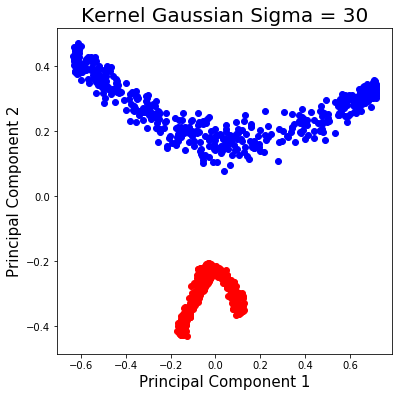

In [141]:
start = time()

sigma_value = 30
    
data_rbf_proj = kernel_rbf_pca(data, sigma_value, 2)

#visualize 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kernel Gaussian Sigma = 30', fontsize = 20)

ax.scatter(data_rbf_proj[0:500,0],data_rbf_proj[0:500,1],c='Red')
ax.scatter(data_rbf_proj[500:1000,0],data_rbf_proj[500:1000,1],c='Blue')

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Estimated running time:0:00:09.542871


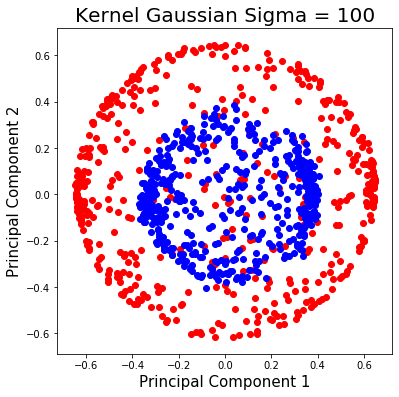

In [142]:
start = time()

sigma_value = 100
    
data_rbf_proj = kernel_rbf_pca(data, sigma_value, 2)

#visualize 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kernel Gaussian Sigma = 100', fontsize = 20)

ax.scatter(data_rbf_proj[0:500,0],data_rbf_proj[0:500,1],c='Red')
ax.scatter(data_rbf_proj[500:1000,0],data_rbf_proj[500:1000,1],c='Blue')

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-6)** How can you estimate a suitable value of sigma given a dataset, i.e. give a method to estimate an appropriate value of sigma given some training data points.  

In [146]:
print("For the Gaussian kernel PCA, the kernel is the function of the pair-wise distances between original data samples. Because we want to separate the different classes in the new feature space, sigma should be smaller than the distances between the two classes but larger than the distances within a class.  This allows us to separate the values between each class in the feature space.  If sigma is too small or too large, you cannot discern between the two classes in the feature space.")  

For the Gaussian kernel PCA, the kernel is the function of the pair-wise distances between original data samples. Because we want to separate the different classes in the new feature space, sigma should be smaller than the distances between the two classes but larger than the distances within a class.  This allows us to separate the values between each class in the feature space.  If sigma is too small or too large, you cannot discern between the two classes in the feature space.


ANS: Through pair-wise distances between original data samples.

## 2) Kernel-SVM on MNIST

In this part, we will use kernel-SVM to classify MNIST digits. 


**2-1)** First, import the subset of MNIST dataset that we were working on in the previous labs. 

In [159]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0


**2-2)** Report classification accuracy on the testing data using kernel-SVM with a 'linear' kernel. (you may use sklearn's built-in commands for this part)

In [160]:
from sklearn import svm

start = time()

labels = range(0,10)
train_labels = np.repeat(labels,1000)
test_labels = np.repeat(labels,100)

kernel='linear'
clf = svm.SVC(kernel=kernel)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.911
Estimated running time:0:00:16.142922


**2-3)** Now, use SVM with 'rbf' kernel. Select three different values of 'gamma' and report (print out) how the test accuracy changes (you may use sklearn's built-in commands for this part.). Hint: In order to get a feeling for selecting an appropriate value for gamma, take a look at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [166]:
gamma1 = 0.1 #random
gamma2 = 1.0/784 #auto
gamma3 = 1.0/(784*(train_data.T).var()) #scale

In [161]:
start = time()

labels = range(0,10)
train_labels = np.repeat(labels,1000)
test_labels = np.repeat(labels,100)

kernel = 'rbf'

clf = svm.SVC(kernel=kernel, gamma = gamma1)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("Accuracy :::: "+str(Acc))


end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.853
Estimated running time:0:02:54.041785


In [164]:
start = time()

labels = range(0,10)
train_labels = np.repeat(labels,1000)
test_labels = np.repeat(labels,100)

kernel = 'rbf'

clf = svm.SVC(kernel=kernel, gamma = gamma2)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.896
Estimated running time:0:00:39.295228


In [165]:
start = time()

labels = range(0,10)
train_labels = np.repeat(labels,1000)
test_labels = np.repeat(labels,100)

kernel = 'rbf'

clf = svm.SVC(kernel=kernel, gamma = gamma3)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("Accuracy :::: "+str(Acc))


end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.947
Estimated running time:0:00:28.805858


# 3) Kernel NN Classifier on Liver Disorders Data Set

In this part, we will be working with BUPA Liver Disorder database from BUPA Medical Research Ltd. (http://archive.ics.uci.edu/ml/datasets/Liver+Disorders). It contains data from 345 male individuals. We have selected the first 245 samples to form the training data and the rest as testing data. 

The first 5 features are results from blood tests. They are sensitive to liver disorders that may arise from excessive alcohol consumption. The sixth feature is the number of drinks per day. The last column specifies whether someone has the disorder or not.

In [167]:
data = np.loadtxt("Liver_Dataset.txt")
train_data = data[0:245,:6]
train_labels = data[0:245,6]
test_data = data[245:,0:6]
test_labels = data[245:,6]

In [168]:
train_data.shape

(245, 6)

In [169]:
train_labels.shape

(245,)

In [170]:
test_data.shape

(100, 6)

In [171]:
test_labels.shape

(100,)

**3-1)** Implement 1-nearest neighbor classifier and report the testing accuracy. You may use sklearn's built-in commands for this part.

In [173]:
from sklearn.neighbors import KNeighborsClassifier
start = time()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_data, train_labels) 

pred_test_labels = neigh.predict(test_data)
Acc = 1 - (np.mean(np.count_nonzero(test_labels-pred_test_labels))/100)
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.61
Estimated running time:0:00:00.007596


**3-2)** Implement kernel-nearest neighbor classifier using 3-th order inhomogeneous polynomial kernel. Report (print out) the testing accuracy. **Do not use sklearn for this part. Follow the steps mentioned in the notes (i.e. through forming the Gram matrix).** How much test accuracy improvement do we achieve using the polynomial kernel?

In [191]:
import numpy as np
import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

def kernel_poly_function(x1,x2,dimension):
    kij = (np.dot(x1,x2)+1)**(dimension)
    return kij

def kernel_poly_matrix(X, dimension):
    #Calculate the dot product for every pair of points
    N = X.shape[0] #number of samples
    M = X.shape[1] #dimensions of data
    
    #Construct the K matrix 
    K = np.zeros((N,N))
    
    for i in range(N):
        x_i = X[i,:]
        for j in range(N):
            x_j = X[j,:]
            K[i,j] = kernel_poly_function(x_i,x_j,dimension)
    
    return K

In [192]:
start = time()

test_class = np.zeros(test_data.shape[0])
K = kernel_poly_matrix(train_data, 3)

for i in range(test_data.shape[0]):
    x = test_data[i,:]
    value_list = np.zeros(train_data.shape[0])
    for j in range(train_data.shape[0]):
        y = train_data[j,:]
        value_list[j] = 2*kernel_poly_function(x,y,3) - K[j,j]
        
    max_idx = np.where(value_list==np.max(value_list))[0][0] 
    test_class[i] = train_labels[max_idx]
    
Acc = np.sum(test_class==test_labels)/len(test_labels)
print("Accuracy :::: "+str(Acc))
    
end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.63
Estimated running time:0:00:00.287870


In [193]:
print("Our accuracy improved by 2%.")

Our accuracy improved by 2%.
